<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Predicting_Lung_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Lung Disease Unsing Deep Learning**↕

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
# import the libraries as shown below

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)



from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

#we will create generic code which can be used for other base models as well
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Desktop/dataset/train'
valid_path = 'Desktop/dataset/test'

In [ ]:
# Import the vgg 16 library as show below and add preprocessing layer to the front of the VGG
#Here, we will be using imagenet weights
#Add image size and remove last layer to do binary classification(i.e imagenet contains about 1000 classes but here we have only two: neumonia or no neumonia)

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [ ]:
# donot train existing weights
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
# useful for getting number of output classes in order to kno how many output to expect
folders = glob('Desktop/dataset/train/*')

In [ ]:
len(folders)

2

In [ ]:
#our layers - more can be added
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
#create a model object
#create a model with vgg as input and output as prediction
model =Model(inputs=vgg.input, outputs=prediction)

In [ ]:
#view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
#compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
#Use and set the Image Data Generator parameters to be applied on the training and test image dataset
#ImageDataGenerator generate batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#Make sure you provide the sdame target size as initiated for the image size
training_set = train_datagen.flow_from_directory('Desktop/dataset/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Desktop/dataset/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
#fit the model
#I run the model with epochs of 5 because of time
#In your spear time, you can run the model like 20 or more times
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 5,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set))

Epoch 1/5
163/163 [==============================] - 301s 2s/step - loss: 0.1643 - accuracy: 0.9316 - val_loss: 0.3470 - val_accuracy: 0.8830
Epoch 2/5
163/163 [==============================] - 280s 2s/step - loss: 0.1073 - accuracy: 0.9597 - val_loss: 0.2637 - val_accuracy: 0.9087
Epoch 3/5
163/163 [==============================] - 281s 2s/step - loss: 0.1123 - accuracy: 0.9565 - val_loss: 0.3953 - val_accuracy: 0.8974
Epoch 4/5
163/163 [==============================] - 282s 2s/step - loss: 0.0836 - accuracy: 0.9695 - val_loss: 0.2376 - val_accuracy: 0.9135
Epoch 5/5
163/163 [==============================] - 281s 2s/step - loss: 0.0701 - accuracy: 0.9766 - val_loss: 0.3001 - val_accuracy: 0.9231


In [ ]:
r.history

{'loss': [0.1642814427614212,
  0.1072508916258812,
  0.11229924857616425,
  0.08357413858175278,
  0.07013048976659775],
 'accuracy': [0.931556761264801,
  0.9597392678260803,
  0.956480085849762,
  0.9695168733596802,
  0.9766104221343994],
 'val_loss': [0.347011536359787,
  0.2637021839618683,
  0.395291805267334,
  0.2376253604888916,
  0.30005866289138794],
 'val_accuracy': [0.8830128312110901,
  0.9086538553237915,
  0.8974359035491943,
  0.9134615659713745,
  0.9230769276618958]}

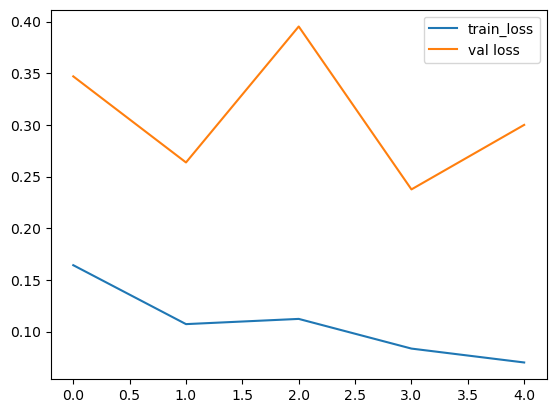

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

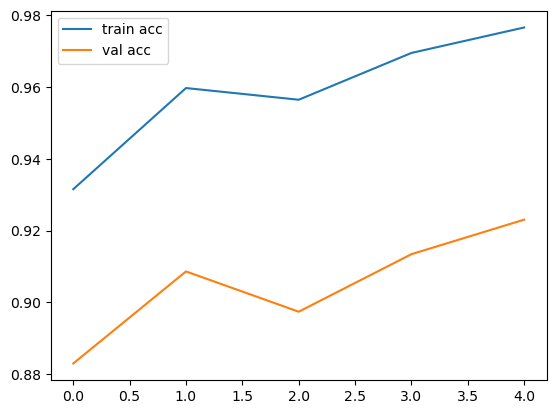

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#save the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')

C:\Users\micha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#A better way to save our model
model.save('my_model')

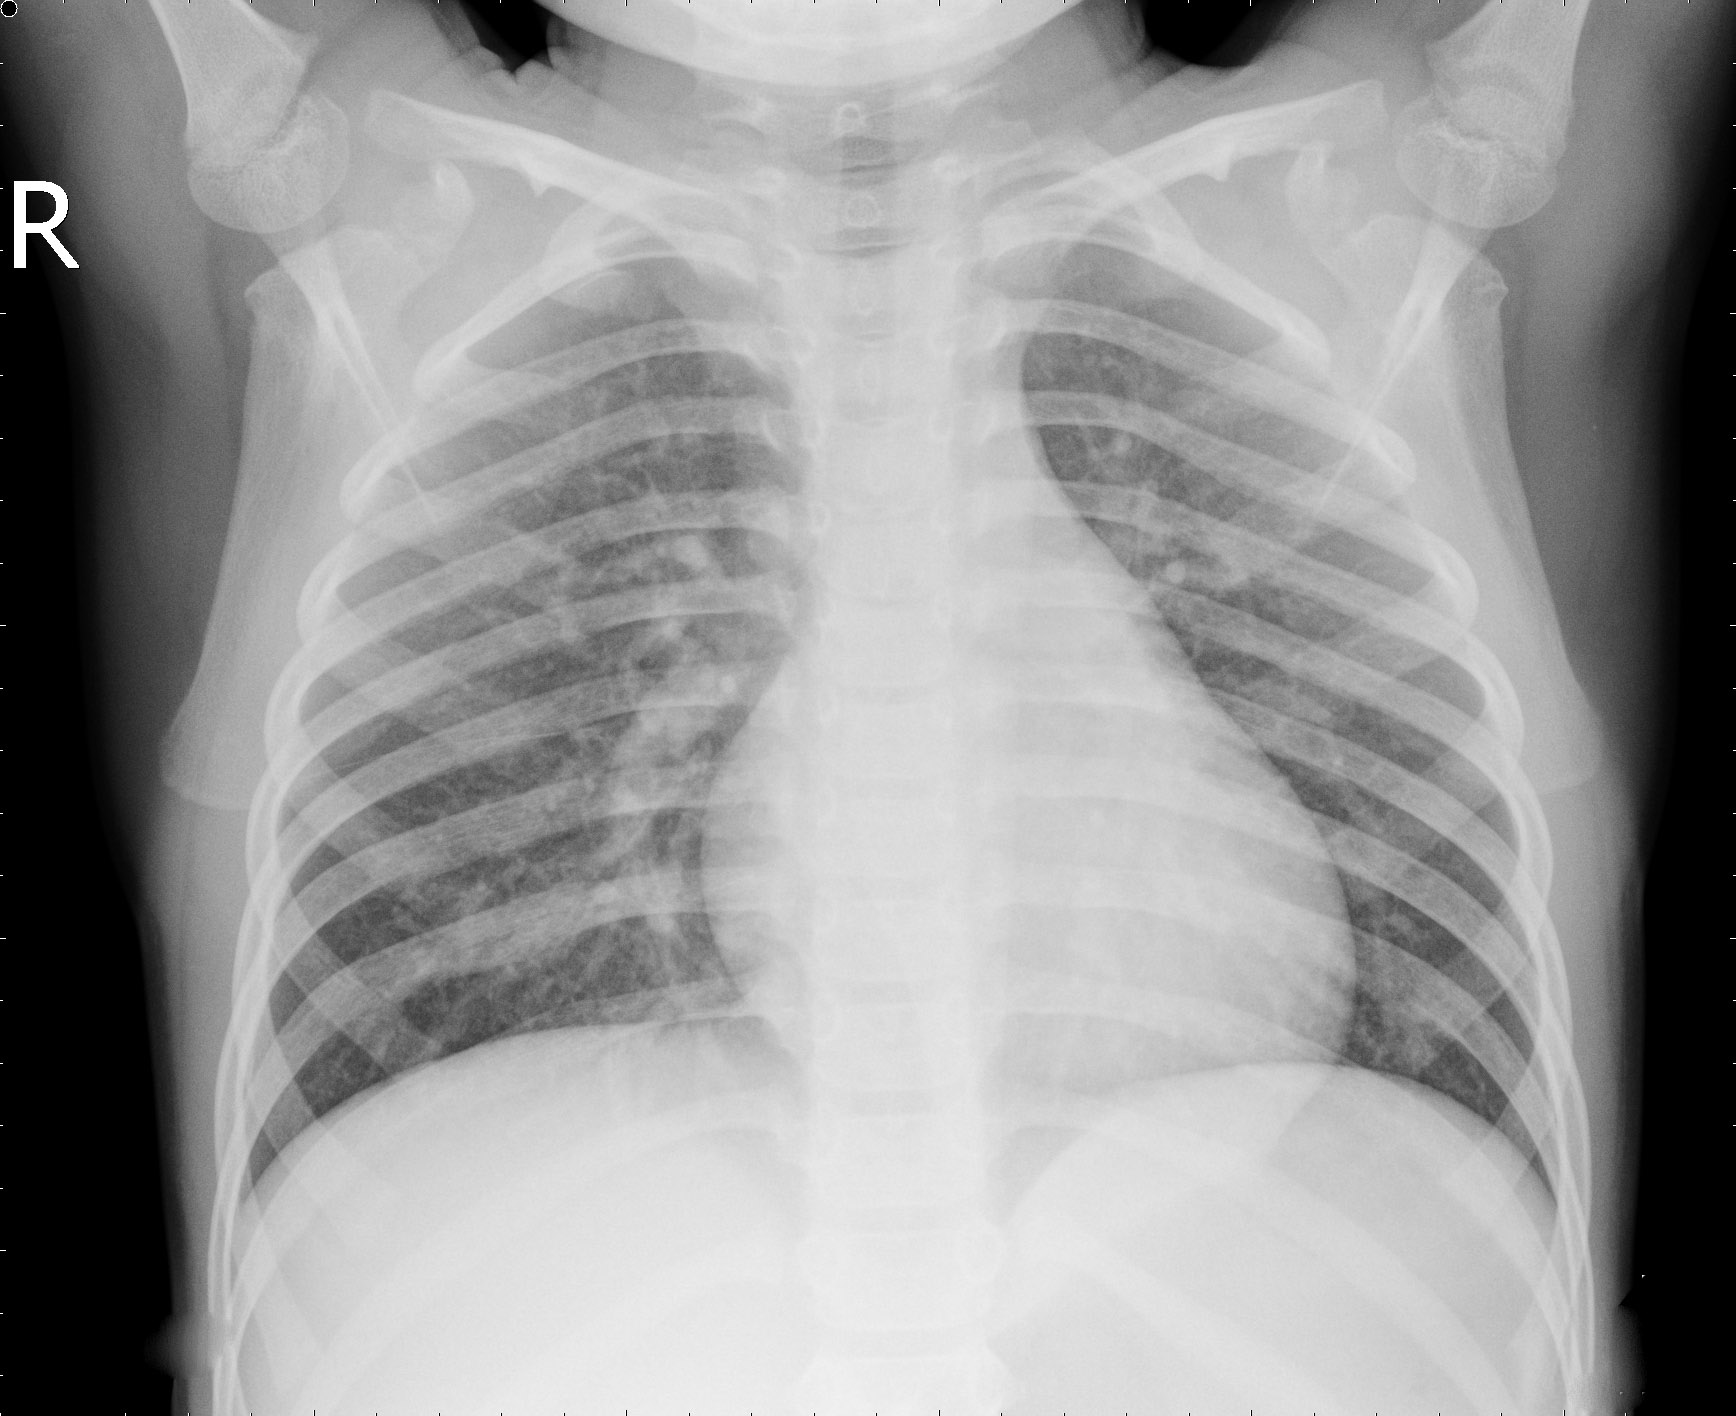

In [ ]:
from IPython.display import display
from PIL import Image

NeumonialPath="Desktop/dataset/val/PNEUMONIA/person1949_bacteria_4880.jpeg"
NormalPath = "Desktop/dataset/val/NORMAL/NORMAL2-IM-1431-0001.jpeg"
display(Image.open(NormalPath))

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np


#model = load_model('model_vgg16.h5')
model = load_model('my_model')

img = image.load_img(NeumonialPath,target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)
if classes[0][0] > classes[0][1]:
    print('X-Ray image is NORMAL')
else:
    print('X-Ray image is Having NEUMONIAL')

1/1 [==============================] - 0s 216ms/step
[[0. 1.]]
X-Ray image is Having NEUMONIAL
